<a href="https://colab.research.google.com/github/Ann924/assignment2/blob/main/Copy_of_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [2]:
! git clone https://www.github.com/Ann924/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 39 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (39/39), 5.47 MiB | 8.07 MiB/s, done.
Resolving deltas: 100% (11/11), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

__Answer:__ This paper is about data tidying following the framework where each variable is a column, each row is an observation, and tables are a way to organize separate observational units.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

__Answer:__ The "tidy data standard" is intented to facilitate the exploration of data while simplifying the tools required for data analysis so that the person can focus on the domain rather than logistics of processing data.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

__Answer:__ The first sentence means that messy datasets can not be treated the same because they have different areas in which they are messy: however, tidy datasets can be processed similarly because they have been standardized into one uniform format. The second sentence speaks to the fact that it is difficult to determine the scope of a variable or observation (when to condense the information into one large component and when to break something apart into smaller components).

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

__Answer:__ Values are either quantitative or qualitative, and they can take the form of numbers or strings (respectively). Variables contain all the values that measure the same attribute across units. Observations contain all the values measured for the same unit across attributes.

  5. How is "Tidy Data" defined in section 2.3?

__Answer:__ Tidy Data must satisfy the following: (1) each variable is a column, (2) each observation is a row, and (3) each type of observational unit is a table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

__Answer:__ The 5 most common problems include: (1) column headers not being variable names, (2) multiple variables being stored in one column, (3) variables stored in rows and columns, (4) multiple observational units stored in one table, (5) observations for a single observational unit stored across multiple tables. Table 4 is messy because the headers are values and not names. Melting a dataset involves converting the columns to the rows and vice versa.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

__Answer:__ Table 11 is messy because there are multiple observational unit types in one table (multiple days). On the other hand, by converting those days (currently as columns) to observational rows, table 12 becomes tidy and "molten" because it follows the tidy definition.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

__Answer:__ The "chicken-and-egg" problem with tidy data is where the data and the tools are mutually dependent so it is difficult to see progress by only changing one. Wickham hopes that in the future, human factors will be able to improve data analysis from a cognitive perspective and allow for the design of improved data wrangling tools.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

__Data Cleaning for Numeric Variable Price__

In [19]:
import pandas as pd
df = pd.read_csv('assignment2/data/airbnb_hw.csv',low_memory=False)
df.head(5)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [20]:
print(df['Price'].describe())
df['Price']

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object


0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: object

Notice that the type of the Price column is set as object. This is not what we want because we want to treat Price as a numeric value.

In [22]:
df['Price'] = pd.to_numeric(df['Price'], errors='raise')

ValueError: ignored

In order to parse these strings, we filter on Price to remove commas and then run to_numeric again.

In [23]:
df['Price'] = df['Price'].apply(lambda x: x.replace(',', ''))

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 



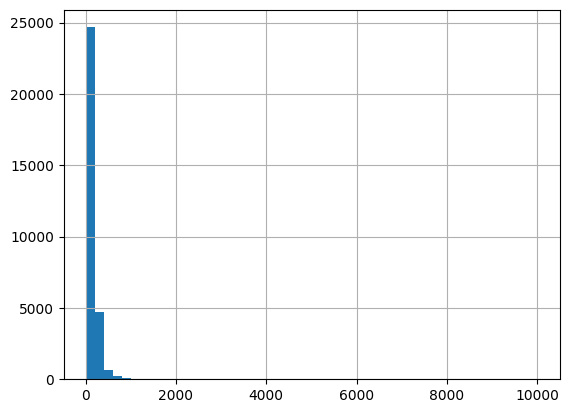

In [24]:
df['Price'] = pd.to_numeric(df['Price'], errors='raise')
# How to create a missing value dummy:
df['Price_nan'] = df['Price'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', df['Price'].describe(),'\n') # Describe the numeric variable
df['Price'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(df['Price_nan']),'\n') # How many missing values are there?

After stripping the commas from the price string representation, we find that we have no null or missing price values. Our quantitative data column has been cleaned.

__Data Cleaning for Categorical Variable:__

In [33]:
df = pd.read_csv('assignment2/data/sharks.csv',low_memory=False)
print(df['Type'].unique(), '\n') # A Categorical Example
print(df['Type'].value_counts(), '\n')

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 



It appears that we can simplify some of these categorical values to have fewer categories:
1. Boatomg might be Boating with a misspelling; Boat and Boating could be synonymous
2. Unverified and Unconfirmed may be equivalent; Under investigation could also be a category of unverified/unconfirmed
3. nan can be defaulted to Unconfirmed since we do not know the type

In [36]:
# Assume Boatomg = Boating
df['Type'] = df['Type'].str.replace('Boating', 'Boat')
df['Type'] = df['Type'].str.replace('Boatomg', 'Boat')
df['Type'] = df['Type'].str.replace('Unverified', 'Unconfirmed')
df['Type'] = df['Type'].str.replace('Under investigation', 'Unconfirmed')
df['Type'] = df['Type'].fillna('Unconfirmed')
print(df['Type'].unique(), '\n') # A Categorical Example

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Invalid' 'Boat' 'Sea Disaster'] 



Additional simplifications could also include combining watercraft and boat, but since the original intent may be to separate out boats from other watercraft vessels, I will not be doing so in this data cleaning exercise.

In [37]:
print(df['Type'].value_counts(), '\n')

Unprovoked      4716
Provoked         593
Invalid          552
Sea Disaster     239
Boat             202
Watercraft       142
Questionable      10
Unconfirmed        8
Name: Type, dtype: int64 



__Data Cleaning with Dummy Variables:__

In [42]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
#url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

URLError: ignored

In [49]:
df = pd.read_csv("assignment2/data/VirginiaPretrialData2017.csv", low_memory=False)

In [50]:
var = 'WhetherDefendantWasReleasedPretrial'
print(df[var].unique())
print(df[var].value_counts(), '\n')

[9 0 1]
1    2202
0    1252
9      10
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



In [52]:
import numpy as np
df[var] = df[var].replace([9], np.nan)
print(df[var].value_counts(), '\n')
print(df[var].unique())

1.0    2202
0.0    1252
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 

[nan  0.  1.]


Replaced the value of 9 with np.nan since 9 is not a valid value for this variable.

__Data Cleaning for Missing Values not at Random__

In [82]:
df = pd.read_csv("assignment2/data/VirginiaPretrialData2017.csv", low_memory=False)
var = 'ImposedSentenceAllChargeInContactEvent'
print(df[var].describe())

count     3463
unique     288
top           
freq      1130
Name: ImposedSentenceAllChargeInContactEvent, dtype: object


In [83]:
# Should be numerical
df[var] = pd.to_numeric(df[var], errors='coerce')
print(df[var].describe())

print("Total Missing: ", sum(df[var].isnull()))

count    2333.000000
mean       48.031892
std       116.760690
min         0.000000
25%         1.971253
50%        12.000000
75%        57.000000
max      2208.000000
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64
Total Missing:  1131


In [84]:
var2 = "SentenceTypeAllChargesAtConvictionInContactEvent"
df.loc[df[var].isnull()][[var2, var]]

,SentenceTypeAllChargesAtConvictionInContactEvent,ImposedSentenceAllChargeInContactEvent
0,9.0,NaN
4,4.0,NaN
11,4.0,NaN
12,4.0,NaN
15,4.0,NaN
...,...,...
3458,4.0,NaN
3460,4.0,NaN
3461,4.0,NaN
3462,4.0,NaN


In [85]:
df.loc[df[var].isnull()][var2].unique()

array([ 9.,  4., nan])

These are the values for the variable SentenceTypeAllChargesAtConvictionInContactEvent that have null corresponding values for ImposedSentenceAllChargeInContactEvent. Looking at the guidebook for these variables, it appears that values of 4 and 9 for sentence type respectively encode Other (deferred, dismissed, pending) and Not Applicable. These sentence types would not be expected to have an imposed sentence value. We can replace the NaN for 0 to fill in these missing values in this context.

In [86]:
df.loc[(df[var2].notnull())&(df[var].isnull()), var] = 0
print(sum(df[var].isnull()))

1


We have one remaining NaN value; this is reasonable because the corresponding value for this observation under the variable  SentenceTypeAllChargesAtConvictionInContactEvent is also NaN. We do not have sufficient information to make an assumption as to what the appropriate Imposed Sentence value should be. Let us leave it as a NaN missing value.

<Axes: >

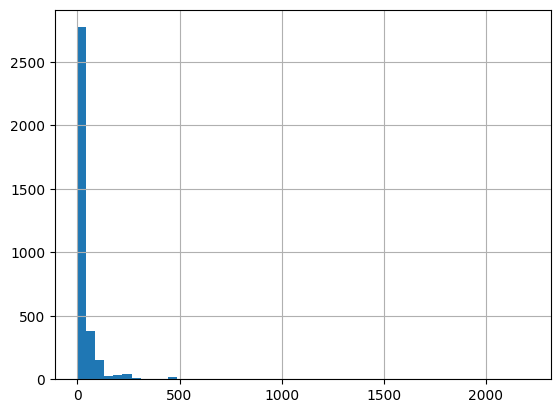

In [87]:
df[var].hist(bins=50)

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.